## Observations and Insights 

Excluding duplicated mice, with mouse ID = g989, there were 248 mice in the study.
The most common treatment in the study was Capomulin, with Propriva being the least-trialled drug.

The gender distribution of the mice in the study was almost even (51% male)

Capomulin and Ramicane appeared to be more effective than Infubinol and Ceftamin (given the smaller tumor volumes)

For the Capomulin regimen, there was a relatively strong positive linear correlation between mice weight and tumor volume.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# get all the rows of the study results where the mouse id and timepoint are equal / duplicated
duplicated_rows_df = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]

#check how many mice have a duplication
duplicated_rows_df["Mouse ID"].nunique()

# get the duplicated mouse ID
duplicated_mouse_ID = duplicated_rows_df["Mouse ID"].iloc[0]
duplicated_mouse_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# when mouse id is equal to the duplicated mouse id
duplicated_mouse_study_results_df = study_results[study_results["Mouse ID"]==duplicated_mouse_ID]

#duplicated_mouse_study_results_df

# merge the study results with the mouse table to get all the data for the duplicated mouse
duplicated_mouse_all_data_df = pd.merge(mouse_metadata, duplicated_mouse_study_results_df, how="inner", on="Mouse ID")

duplicated_mouse_all_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_studyresults_df = study_results[study_results["Mouse ID"]!="g989"]

# get the clean combined data frame by merginng the clean study results table with the mouse table
clean_combined_df = pd.merge(mouse_metadata, clean_studyresults_df, how="inner", on="Mouse ID")

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group the data by drug regimen
drug_regimen_groupby = clean_combined_df.groupby(["Drug Regimen"])

#get the tumor volume stats 
mean = drug_regimen_groupby['Tumor Volume (mm3)'].mean()
median = drug_regimen_groupby['Tumor Volume (mm3)'].median()
variance = drug_regimen_groupby['Tumor Volume (mm3)'].var()
standard_dv = drug_regimen_groupby['Tumor Volume (mm3)'].std()
sem =drug_regimen_groupby['Tumor Volume (mm3)'].sem()

#combine the stats in a summary table
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem}).round(3)

summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function



## Bar and Pie Charts

In [11]:
# for "Total number of mice", we need to only show 1 row for each mouse
unique_clean_combined_df=clean_combined_df.drop_duplicates(subset=['Mouse ID'])

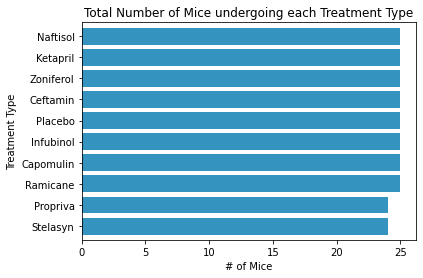

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


drug_regmens_counts = unique_clean_combined_df['Drug Regimen'].value_counts()
y_axis = np.arange(len(drug_regmens_counts))

#Creating Chart
drug_regmens_counts.sort_values(ascending=True).plot(kind="barh", width=0.8, color='#3594BF')

#set chart title
plt.title("Total Number of Mice undergoing each Treatment Type")
plt.ylabel("Treatment Type")
plt.xlabel("# of Mice")
plt.show()


In [13]:
# testing reversing arrays, in order to change from ascending to descending
y_axis[::-1]
drug_regmens_counts.index.values[::-1]

array(['Propriva', 'Stelasyn', 'Naftisol', 'Ketapril', 'Zoniferol',
       'Ceftamin', 'Placebo', 'Infubinol', 'Capomulin', 'Ramicane'],
      dtype=object)

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


plt.barh(y_axis[::-1], drug_regmens_counts.sort_values(ascending=False),height =0.8,color='#3594BF')
tick_locations = [value for value in y_axis]
plt.yticks(tick_locations, drug_regmens_counts.index.values[::-1])

#plt.barh(drug_regimens,regimen_count)
plt.title("Total Number of Mice undergoing each Treatment Type")
plt.ylabel("Treatment Type")
plt.xlabel("# of Mice")
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df= unique_clean_combined_df.groupby(["Sex"]).count().reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df["Colours"]=["#FC2DF5","#2786DD"]


gender_df.plot(kind="pie", 
               y = "Count", 
               autopct='%1.2f%%',
               legend=False,
               startangle=90,
               shadow=True, 
               labels=gender_df["Sex"],
               colors = gender_df["Colours"],
               explode = (0.1, 0))

plt.title("Gender Distribution of Mice Trialed")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df= unique_clean_combined_df.groupby(["Sex"]).count()
gender_df = gender_df[["Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df["Colours"]=["#FC2DF5","#2786DD"]

plt.pie(gender_df["Count"],
        labels=gender_df.index,
        colors=gender_df["Colours"],
        autopct="%1.2f%%", 
        shadow=True, 
        startangle=90,
       explode = (0.1, 0))

plt.title("Gender Distribution of Mice Trialed")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#List of the 4 top treatments
Treatment_List=["Capomulin","Ramicane","Infubinol","Ceftamin"]
Treatment_values=[]

# Sort the data by the timpoint (descending)
sorted_df=clean_combined_df.sort_values(["Timepoint"], ascending=False)

# becuase the data is sorted by timepoint, Dropping duplicates will leave only the the "latest" timepoint for each mouse
latest_df=sorted_df.drop_duplicates(subset=['Mouse ID'])
latest_df

empty_df = pd.DataFrame(columns=['Regimen','Low Q','Up Q',"IQR","L Bnd","U Bnd","#O-Liers"])

for regimen in Treatment_List:
    _df = latest_df.loc[latest_df['Drug Regimen'] == regimen]
    values = _df['Tumor Volume (mm3)']
    Treatment_values.append(values)
    quartiles = values.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)

    iqr = round(upperq - lowerq,2)

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    outliers_count = (values.loc[(latest_df['Tumor Volume (mm3)'] > upper_bound) | (latest_df['Tumor Volume (mm3)'] < lower_bound)]).count()
    
    data = {"Regimen": regimen,
            "Low Q":lowerq,
            "Up Q":upperq,
            "IQR":iqr,
            "L Bnd":lower_bound,
            "U Bnd":upper_bound,
            "#O-Liers":outliers_count}
    
    empty_df.loc[regimen]=data
    
empty_df

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(Treatment_values, labels=Treatment_List,sym="x")
plt.title("Box Plot: Final Tumor Volume vs Treatment Type")
plt.xlabel("Treatment Type")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df=clean_combined_df[clean_combined_df["Drug Regimen"]=="Capomulin"]
no_of_capo=len(capomulin_df)
rando=np.random.randint(0,no_of_capo)
mouseID=capomulin_df.iloc[rando]["Mouse ID"]
chosen_mouse_df=clean_combined_df[clean_combined_df["Mouse ID"]== mouseID]
chosen_mouse_df
plt.plot(chosen_mouse_df['Timepoint'], chosen_mouse_df['Tumor Volume (mm3)'], marker = 'o')
plt.title(f"Tumor Volume over time for mouse {mouseID}")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df
capomulin_averages_df = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_averages_df
plt.scatter(capomulin_averages_df['Weight (g)'],capomulin_averages_df['Tumor Volume (mm3)'])
plt.title("Avg Tumor Vol vs Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(capomulin_averages_df['Weight (g)'],capomulin_averages_df['Tumor Volume (mm3)'])

In [ ]:
capomulin_averages_df = capomulin_df.groupby(['Mouse ID']).mean()

line = slope*(capomulin_averages_df['Weight (g)'])+intercept

annotation=f"y={round(slope,2)}x+{round(intercept,2)}"

plt.scatter(capomulin_averages_df['Weight (g)'],capomulin_averages_df['Tumor Volume (mm3)'])

plt.plot(capomulin_averages_df['Weight (g)'], line,color="red")

plt.annotate(annotation, xy=(16,44),color="red")
plt.annotate(f" r={round(rvalue,2)}", xy=(16,43),color="red")

plt.title("Avg Tumor Vol vs Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()